In [160]:
import camera_calibration as cc
# make sure to reload the module if it was already imported
import importlib
importlib.reload(camera_calibration)
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path('../data')
IMAGE_NAME = Path('calibration1.jpg')

In [161]:
# Test OpenCV based camera calibration
ocv_cam_calib = cc.OpenCvCalibration((9, 6), 1.0)


# read image
img = cv2.imread(str(IMAGES_PATH/IMAGE_NAME))

# calibrate camera
ocv_camera_calib_params = ocv_cam_calib.calibrate_camera(img)
ocv_camera_calib_params

CameraCalibParams(camera_matrix=array([[1.41190742e+03, 0.00000000e+00, 2.09608670e+02],
       [0.00000000e+00, 1.42747678e+03, 2.13588372e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), dist_coeffs=array([[-6.05265978e-01,  8.41554213e+00,  3.00288903e-03,
         3.39778338e-02, -8.86803818e+01]]), rvecs=array([[0.13429319],
       [0.11758268],
       [3.1250984 ]]), tvecs=array([[ 6.0737534 ],
       [ 2.88667528],
       [29.77869896]]))

In [162]:
# Test Minimal Camera Calibration
minimal_cam_calib = cc.MinimalCameraCalibration((9, 6), 1.0)

minimal_camera_calib_params = minimal_cam_calib.calibrate_camera(img)
minimal_camera_calib_params

CameraCalibParams(camera_matrix=array([[640.,   0., 320.],
       [  0., 640., 240.],
       [  0.,   0.,   1.]]), dist_coeffs=array([[0., 0., 0., 0., 0.]]), rvecs=array([[0.07375411],
       [0.04137587],
       [3.12770638]]), tvecs=array([[ 3.73540403],
       [ 2.33768015],
       [13.4053155 ]]))

In [163]:
# Test basic camera calibration
# Doesn't work, needs non-coplanar points
basic_cam_calib = cc.BasicCameraCalibration((9, 6), 1.0)
basic_cam_calib_params = basic_cam_calib.calibrate_camera(img)
basic_cam_calib_params

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan inf nan]]


CameraCalibParams(camera_matrix=array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]]), dist_coeffs=array([[0., 0., 0., 0., 0.]]), rvecs=array([[nan, nan, nan],
       [ 0., nan, nan],
       [ 0.,  0., nan]]), tvecs=array([nan, nan, nan]))

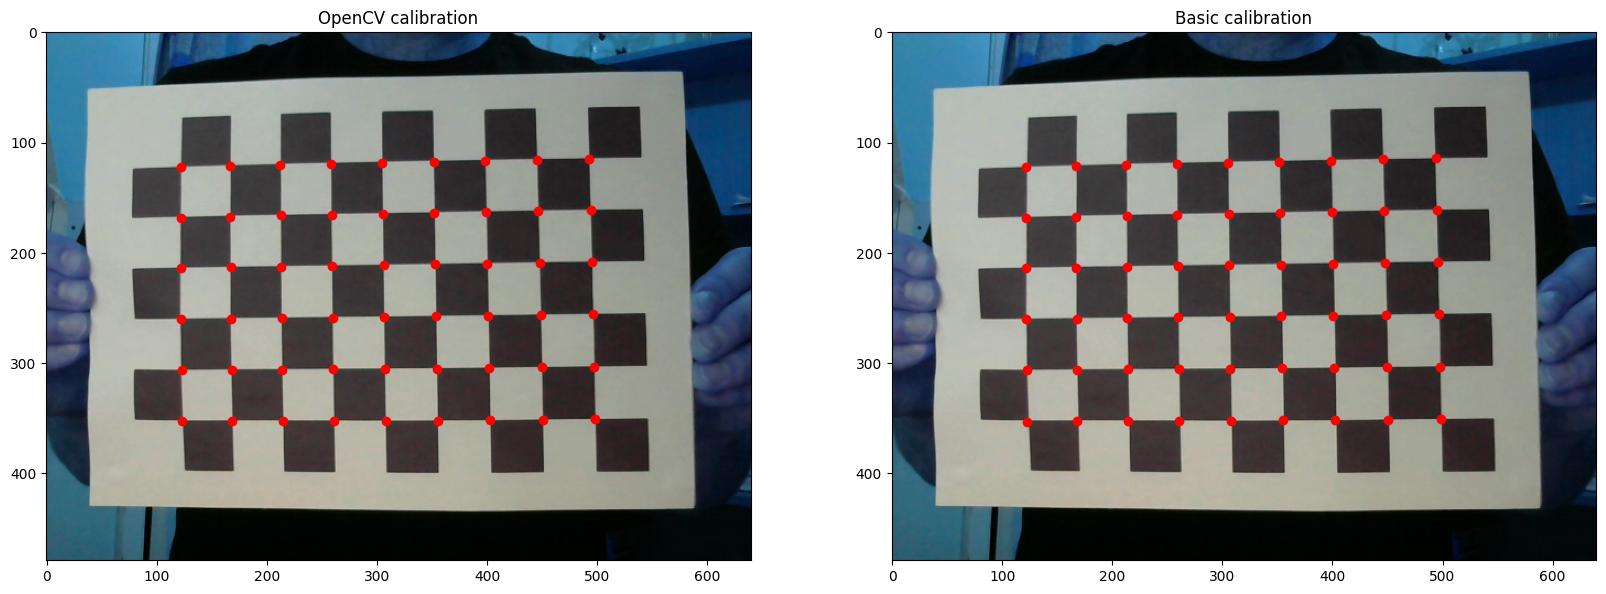

In [164]:
# compare the calibration results of the two calibration methods
# reproject pattern points to the image plane

pattern_points = ocv_cam_calib.get_3d_points()
ocv_image_points = ocv_cam_calib.project_points(pattern_points, ocv_camera_calib_params)
basic_image_points = minimal_cam_calib.project_points(pattern_points, minimal_camera_calib_params)

# plot the results with matplotlib
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img)
ax[0].plot(ocv_image_points[:, 0, 0], ocv_image_points[:, 0, 1], 'ro')
ax[0].set_title('OpenCV calibration')
ax[1].imshow(img)
ax[1].plot(basic_image_points[:, 0, 0], basic_image_points[:, 0, 1], 'ro')
ax[1].set_title('Basic calibration')
plt.show()
